In [1]:
import os
import nltk

In [16]:
print(os.listdir(nltk.data.find('corpora')))

['abc', 'abc.zip', 'alpino', 'alpino.zip', 'biocreative_ppi', 'biocreative_ppi.zip', 'brown', 'brown.zip', 'brown_tei', 'brown_tei.zip', 'cess_cat', 'cess_cat.zip', 'cess_esp', 'cess_esp.zip', 'chat80', 'chat80.zip', 'city_database', 'city_database.zip', 'cmudict', 'cmudict.zip', 'comparative_sentences', 'comparative_sentences.zip', 'comtrans.zip', 'conll2000', 'conll2000.zip', 'conll2002', 'conll2002.zip', 'conll2007.zip', 'crubadan', 'crubadan.zip', 'dependency_treebank', 'dependency_treebank.zip', 'dolch', 'dolch.zip', 'europarl_raw', 'europarl_raw.zip', 'floresta', 'floresta.zip', 'framenet_v15', 'framenet_v15.zip', 'framenet_v17', 'framenet_v17.zip', 'gazetteers', 'gazetteers.zip', 'genesis', 'genesis.zip', 'gutenberg', 'gutenberg.zip', 'ieer', 'ieer.zip', 'inaugural', 'inaugural.zip', 'indian', 'indian.zip', 'jeita.zip', 'kimmo', 'kimmo.zip', 'knbc.zip', 'lin_thesaurus', 'lin_thesaurus.zip', 'machado.zip', 'mac_morpho', 'mac_morpho.zip', 'masc_tagged.zip', 'movie_reviews.zip', 'm

Movies are cool, lets check out that data set!

In [213]:
m_set = nltk.corpus.movie_reviews
print(m_set.categories())

['neg', 'pos']


In [6]:
# Group positive and negative review file names
fids_pos = m_set.fileids(categories='pos')
fids_neg = m_set.fileids(categories='neg')

n_pos = len(fids_pos)
n_neg = len(fids_neg)

print('Number of reviews:')
print('Positive: ' + str(n_pos))
print('Negative: ' + str(n_neg))

# Store reviews
reviews_pos = [m_set.open(file).read() for file in fids_pos]
reviews_neg = [m_set.open(file).read() for file in fids_neg]

Number of reviews:
Positive: 1000
Negative: 1000


In [8]:
import pandas as pd

In [138]:
# Build array of labels corresponding to the reviews
labels = ['pos'] * len(reviews_pos) + ['neg'] * len(reviews_neg)

# Compile all reviews in one set
review_array = reviews_pos + reviews_neg

# Make dataframe of reviews and labels
reviews = pd.DataFrame(data=list(zip(labels,review_array)), columns=['Label', 'Review'])
reviews['Length'] = reviews['Review'].apply(len)

# Shuffle dataframe to randomize order of data
reviews = reviews.sample(frac=1).reset_index(drop=True)
reviews

,Label,Review,Length
0,neg,cashing in on the success of white men can't j...,2533
1,neg,for timing reasons having to do with baby sitt...,1256
2,pos,for those who associate italian cinema with fe...,3329
3,neg,"the haunting , a film so confusing that it for...",4475
4,pos,"it's terribly unfortunate that "" stir of echoe...",6092
...,...,...,...
1995,neg,capsule : a ham-handed and over/underwritten m...,5246
1996,pos,weir is well-respected in hollywood for turnin...,3225
1997,pos,"apocalypse now , based on the novel "" hearts o...",2959
1998,neg,there should be a requirement that a potential...,7752


In [139]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Review Length Histogram')

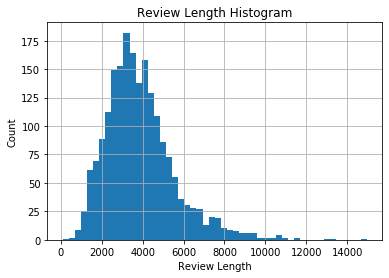

In [140]:
reviews['Length'].hist(bins=50)
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Review Length Histogram')

In [214]:
# TODO: histogram review lengths for positive and negative reviews

In [12]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 

In [141]:
# Remove punctuation and stop words from a message
def process_reviews(review):
    # Split reviews into tokens free of punctuation
    char_tokenizer = RegexpTokenizer(r'\w+')
    no_punc = char_tokenizer.tokenize(review)
    
    # Remove common words like and, the, if, etc.
    no_stopwords = [word for word in no_punc if word.lower() not in stopwords.words('english')]
    return ' '.join(no_stopwords)

In [145]:
print(reviews['Review'][0])

cashing in on the success of white men can't jump and the failure of most of their solo vehicles ( including the cowboy way and drop zone ) , wesley snipes and woody harrelson have reteamed , hoping that they can strike up the same success . 
sadly , if this dismal , cliche ridden and mind-numbingly boring action pic is anything to go by , they haven't got a chance in hell of even coming close . 
this time out , the duo play foster brothers who are transit cops . 
following several run-ins with their tyrannical boss ( robert blake ) , who is obsessed with the " money train " --a train which carries all the subway's takings--and will let nothing stop it ( now * there's * an original plot device ) , harrelson's character decides to try and take off with the cash . 
along the way , both of them fall in love with the same woman--another transit cop who also hates her boss . 
this leads to the typical sibling rivalry crap that you usually find in a film of this standard ( 'you were always t

Harsh review. Looks rather wordy and difficult to read. Let's clean it up! 

In [143]:
reviews_clean = reviews['Review'].apply(process_reviews)
print(reviews_clean[0])

cashing success white men jump failure solo vehicles including cowboy way drop zone wesley snipes woody harrelson reteamed hoping strike success sadly dismal cliche ridden mind numbingly boring action pic anything go got chance hell even coming close time duo play foster brothers transit cops following several run ins tyrannical boss robert blake obsessed money train train carries subway takings let nothing stop original plot device harrelson character decides try take cash along way fall love woman another transit cop also hates boss leads typical sibling rivalry crap usually find film standard always better brother etc etc etc help add anything film given better script better performers supporting roles shorter running time film almost went two hours feel like film might mean might turned okay stocked worst action film cliches whose purpose appears pad film painfully long running time robert blake plays evil boss got pathetic bad guy film history sounds like wayne newton appears thin

In [146]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [147]:
# Bag-of-words transformation
vectorizer = CountVectorizer()
reviews_bow = vectorizer.fit_transform(raw_documents=reviews_clean)

# Normalize and weight document vectors using a Term Frequency-Inverse Document Frequency weighting
tfidf_transformer = TfidfTransformer()
reviews_tfidf = tfidf_transformer.fit_transform(reviews_bow)

In [188]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [209]:
# Slit into training and testing sets
train_test_ratio = 0.25  
n_train = round(train_test_ratio * (n_pos + n_neg))
x_train = reviews_tfidf[:n_train]
y_train = reviews['Label'][:n_train]

x_test = reviews_tfidf[n_train:]
y_test = reviews['Label'][n_train:]

# Fit model - using a Niave Bayes classifier model
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [210]:
# Evaluate model
print('Mean Accuracy: {:.2f} %\n'.format(model.score(x_test, y_test)*100))
print ('Classification Report: \n', classification_report(y_test, model.predict(x_test)))

Mean Accuracy: 75.87 %

Classification Report: 
               precision    recall  f1-score   support

         neg       0.73      0.83      0.77       746
         pos       0.80      0.69      0.74       754

    accuracy                           0.76      1500
   macro avg       0.76      0.76      0.76      1500
weighted avg       0.76      0.76      0.76      1500



### Discussion
As an initial attempt at my own NLP project I was very pleased with the results. However, there is certainly room for improvement and I will continue to work on my model. As far as preprocessing goes, there is a lot I could do to my data that I have not attempted yet. I will expand upon my bag of words normalization and begin exploring techniques such as stemming/lemmatization and distinguishing parts of speach. For my actual model, I will begin experimenting with some other classifiers (like support vector machines, for example) and see their performance with the data as well as. If all else fails I could always serch for additional datasets or scape my own!